# Wine Quality Analysis

## I. Introduction:

The goal of this project is to conduct a comprehensive machine learning analysis of the Wine Quality datasets.

Our primary objective is to develop a robust predictive model capable of estimating and classifying the target quality score of wines based solely on their given physicochemical properties (features).

This study will focus on identifying which chemical features are the most critical determinants of perceived quality, thereby providing actionable insight into the factors that drive wine assessment.

## II. Data exploration:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# --- 1. Data Loading ---
print("--- 1. Loading the Wine Datasets ---")

try:
    df_white = pd.read_csv('data/winequality-white.csv', sep=';')
    df_red = pd.read_csv('data/winequality-red.csv', sep=';')

    print("Data successfully loaded.")
except FileNotFoundError:
    print(f"Error: The files are not found in the specified directory.")
    exit()



df_red['type'] = 'red'
df_white['type'] = 'white'

df_wine = pd.concat([df_red, df_white], ignore_index=True)

print("--- First 5 rows of the combined DataFrame: ---")
print(df_wine.head())

print("\n--- Technical information about the DataFrame (df_wine.info()): ---")
df_wine.info()

--- 1. Loading the Wine Datasets ---
Data successfully loaded.
--- First 5 rows of the combined DataFrame: ---
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9

There are no missing values in this dataset, so we don't need to do a specific data clean before starting analyzing.

In [2]:
# --- 3. Basic Descriptive Analysis ---
df_wine['type'] = df_wine['type'].map({'red': 0, 'white': 1})
print("\n--- 3. Basic Descriptive Analysis (Describe) ---")
print(df_wine.describe().T) 

print(df_wine.head())


--- 3. Basic Descriptive Analysis (Describe) ---
                       count        mean        std      min       25%  \
fixed acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free sulfur dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total sulfur dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000  

Quality is therefore a int from 3 to 9



--- 4. Target Variable ('quality') Distribution Analysis ---

** Sample Count per Quality Score **
         Sample Count
quality              
3                  30
4                 216
5                2138
6                2836
7                1079
8                 193
9                   5


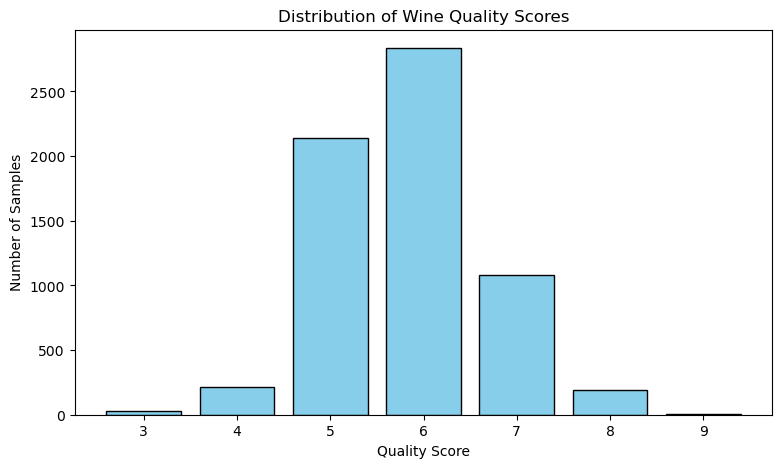

In [3]:
# --- 4. Visualization and Count of the Target Variable ('quality') ---
print("\n--- 4. Target Variable ('quality') Distribution Analysis ---")

# 1. Calculate the exact count for each quality score
quality_counts = df_wine['quality'].value_counts().sort_index()

print("\n** Sample Count per Quality Score **")
# Convert the Series to a DataFrame for cleaner table display
quality_table = pd.DataFrame(quality_counts)
quality_table.columns = ['Sample Count']
print(quality_table)

# 2. Visualization (Histogram)
plt.figure(figsize=(9, 5))
plt.hist(df_wine['quality'], bins=range(3, 11), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Number of Samples')
plt.show()

In [4]:
# --- 5. Correlation Analysis with the Target ---
print("\n--- 5. Feature Correlation with Quality ---")
# Calculate correlation, sort by relevance to 'quality'
correlation_to_quality = df_wine.corr()['quality'].sort_values(ascending=False)
print(correlation_to_quality)


--- 5. Feature Correlation with Quality ---
quality                 1.000000
alcohol                 0.444319
type                    0.119323
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


We can observe some features more correlated to quality than others. For instance, we k now that alcohol is gonna be important while citric acid might be impactless.

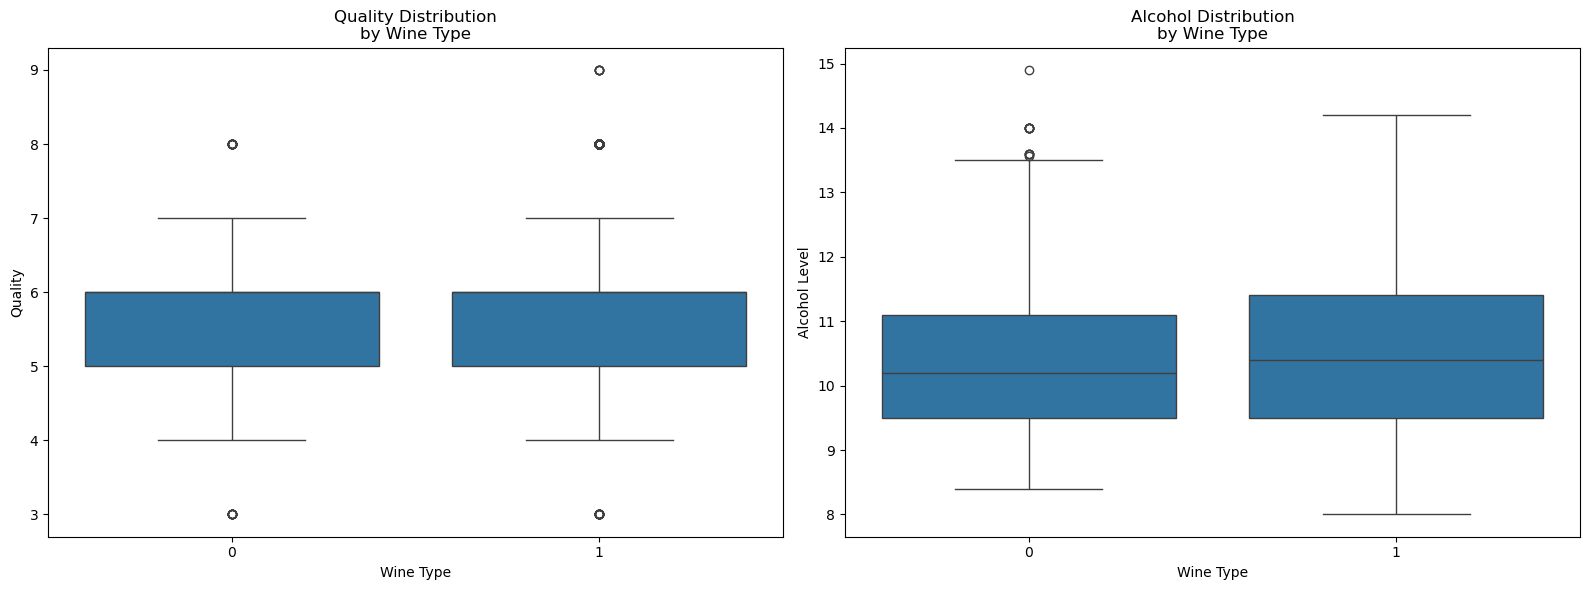

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Analysis of the 'type' variable (Red vs White) ---

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Quality by Type ---
sns.boxplot(x='type', y='quality', data=df_wine, ax=ax1)
ax1.set_title('Quality Distribution\nby Wine Type')
ax1.set_xlabel('Wine Type')
ax1.set_ylabel('Quality')

# --- Plot 2: Alcohol by Type ---
sns.boxplot(x='type', y='alcohol', data=df_wine, ax=ax2)
ax2.set_title('Alcohol Distribution\nby Wine Type')
ax2.set_xlabel('Wine Type')
ax2.set_ylabel('Alcohol Level')

plt.tight_layout()
plt.show()

# III. Feature engineering

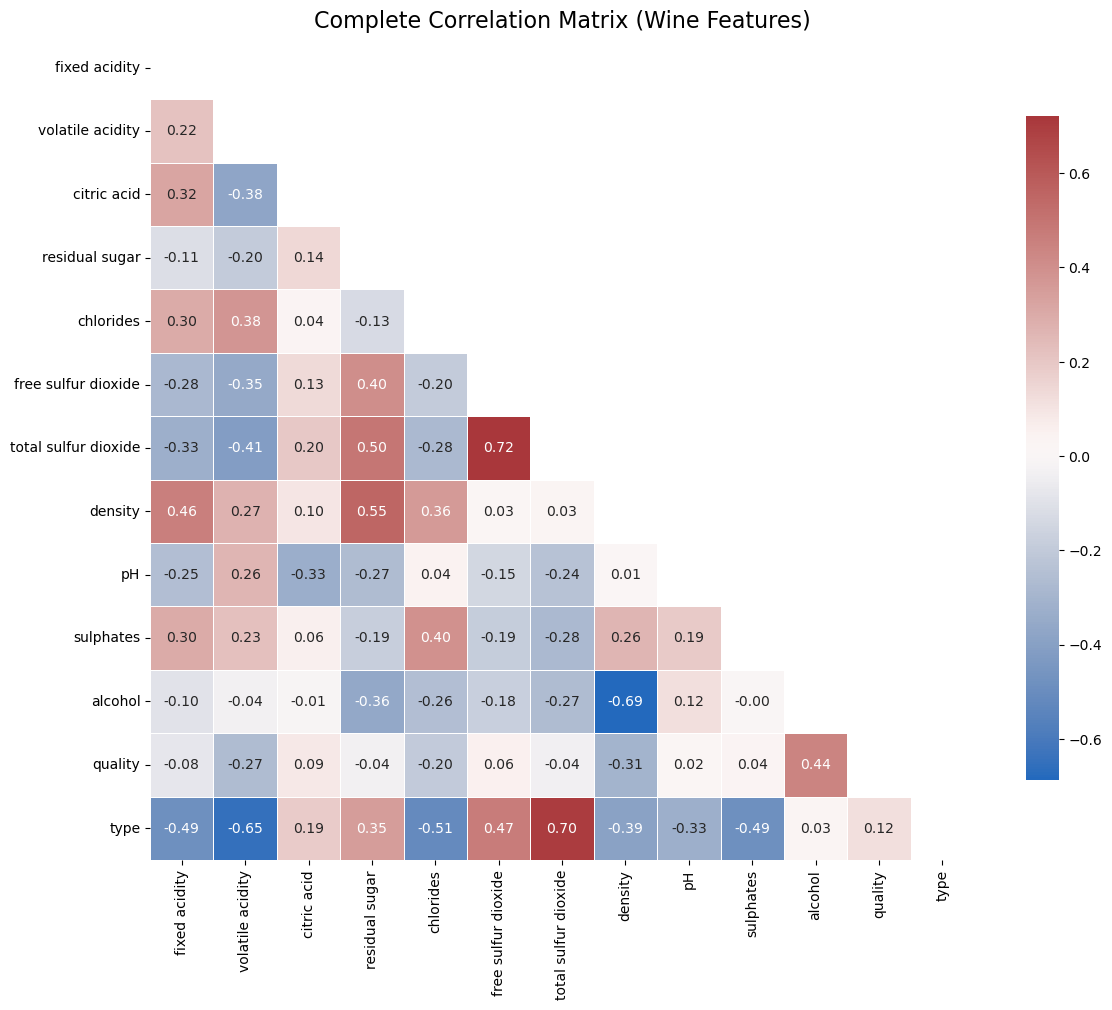

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate the Correlation Matrix
cor_mat = df_wine.corr()

# 2. Create a Mask to show only the Upper Triangle
mask = np.triu(cor_mat)

# 3. Plotting the Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    cor_mat, 
    mask=mask, 
    annot=True,              # Display correlation values on the plot
    fmt=".2f",               # Format values to two decimal places
    cmap='vlag',             
    cbar_kws={"shrink": .8}, # Shrink the color bar a bit
    square=True,             # Ensure cells are square
    linewidths=.5,           # Lines between cells
    cbar=True                # Display the color bar
)

plt.title('Complete Correlation Matrix (Wine Features)', fontsize=16)
plt.tight_layout()
plt.show()


The heatmap of the correlation matrix makes us realize that we are gonna be able to keep a lot of information while reducing the number of features. For instance:

- citric acid and free sulfur dioxide seem impactless to estimate the quality
- density and residual sugar are heavily correlated which means that we may erase one

We can now do a PCA to determine how many features we need to get 90% variance

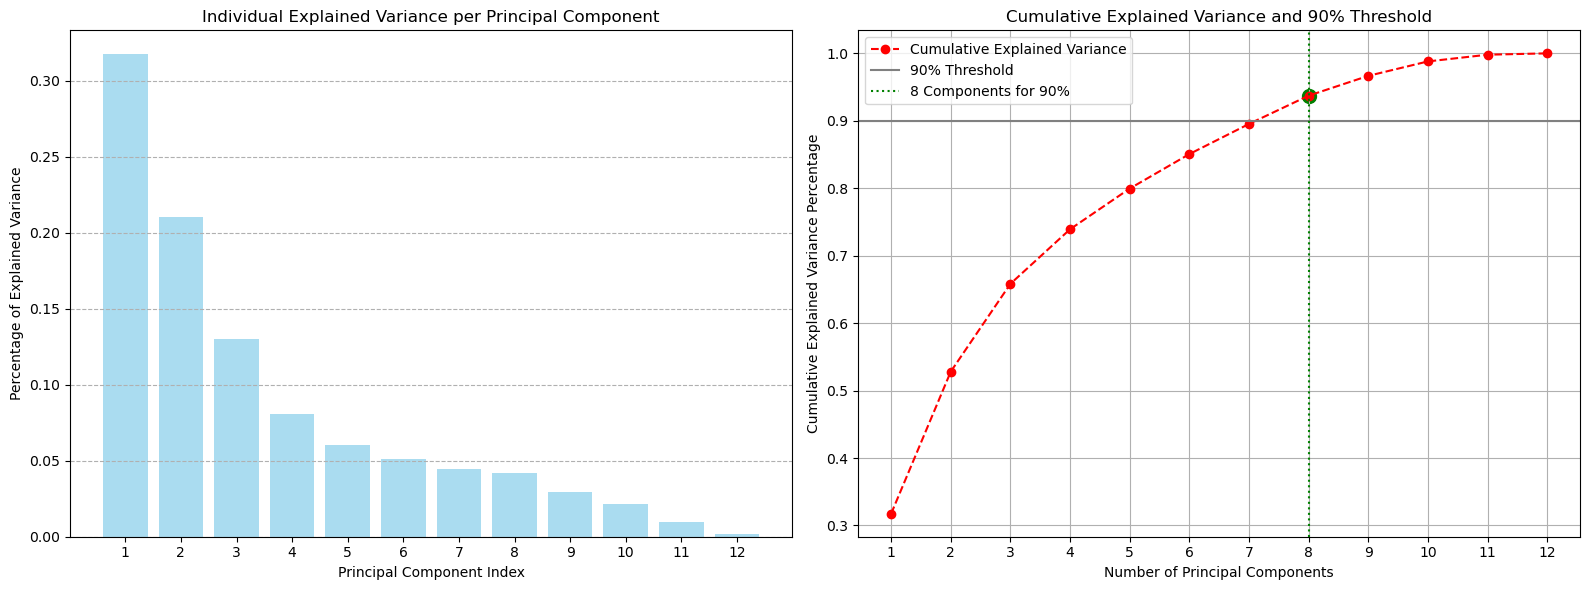


--- PCA Results Summary ---
Total number of features: 12
Number of components needed to explain 90% of the variance: 8
Variance explained by the first 8 components: 0.94


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# --- 1. Data Preparation for PCA ---
# Isolate features (X) and the target (y - not used in PCA but good practice)
X = df_wine.drop('quality', axis=1) 
y = df_wine['quality']

# 2. Standardization (Crucial step for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 2. Perform Principal Component Analysis (PCA) ---
pca = PCA(n_components=None)
pca.fit(X_scaled)

# --- 3. Analyze Explained Variance ---
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Identify the number of components needed to reach 90%
n_components_90 = np.where(cumulative_explained_variance >= 0.90)[0][0] + 1


# --- 4. Plotting the Variance explained per vector ---
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1) # First subplot: Variance per component
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, color='skyblue', label='Individual Explained Variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Percentage of Explained Variance')
plt.title('Individual Explained Variance per Principal Component')
plt.grid(axis='y', linestyle='--')
plt.xticks(range(1, len(explained_variance_ratio) + 1)) # Ensure integer ticks on x-axis

# --- 5. Plotting the Cumulative Variance Explained ---
plt.subplot(1, 2, 2) # Second subplot: Cumulative Variance
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='red', label='Cumulative Explained Variance')

# Add 90% threshold line
plt.axhline(y=0.90, color='grey', linestyle='-', label='90% Threshold')
# Mark the point where 90% is crossed
plt.axvline(x=n_components_90, color='green', linestyle=':', label=f'{n_components_90} Components for 90%')
plt.scatter(n_components_90, cumulative_explained_variance[n_components_90 - 1], color='green', s=100)


plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Percentage')
plt.title('Cumulative Explained Variance and 90% Threshold')
plt.legend()
plt.grid(True)
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.tight_layout()
plt.show()

# --- 6. Conclusion ---
print("\n--- PCA Results Summary ---")
print(f"Total number of features: {X.shape[1]}")
print(f"Number of components needed to explain 90% of the variance: {n_components_90}")
print(f"Variance explained by the first {n_components_90} components: {cumulative_explained_variance[n_components_90 - 1]:.2f}")

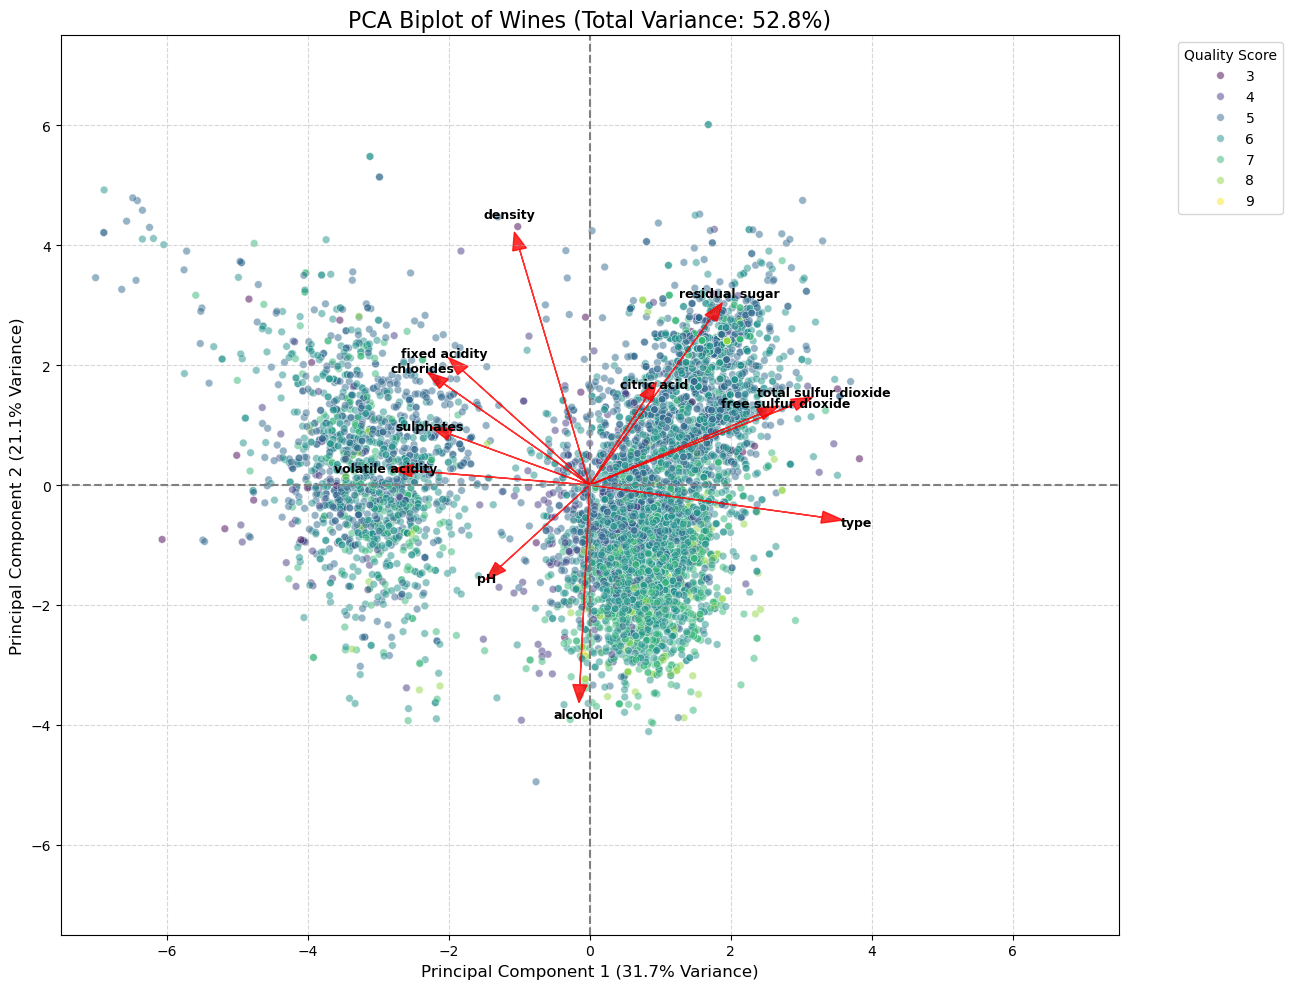

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- 1. Re-create the PCA DataFrame (from previous cell) ---
X_pca = pca.transform(X_scaled)
pca_df = pd.DataFrame(data=X_pca[:, 0:2], columns=['PC1', 'PC2'])
pca_df['quality'] = y.values

# --- 2. Get the Feature Loadings (the directions of the arrows) ---
loadings = pca.components_.T
feature_names = X.columns # Get the original feature names

# --- 3. Set up the Plot (Scatter + Arrows) ---
plt.figure(figsize=(13, 10))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='quality', 
    data=pca_df, 
    palette='viridis', 
    alpha=0.5,
    s=30,
    legend='full'
)

# --- 4. Add the Arrows (the loadings) ---
scale_factor = 7 

for i, (feature_name, loading) in enumerate(zip(feature_names, loadings)):
    # Arrow properties
    plt.arrow(
        0, 0, # Start at the origin (0,0)
        loading[0] * scale_factor, # PC1 component (scaled)
        loading[1] * scale_factor, # PC2 component (scaled)
        color='r', 
        head_width=0.2, 
        head_length=0.3, 
        alpha=0.8
    )
    # Arrow label
    plt.text(
        loading[0] * scale_factor * 1.15, # Position the text slightly outside the arrow
        loading[1] * scale_factor * 1.15,
        feature_name, 
        color='black', 
        ha='center', 
        va='center',
        fontsize=9,
        fontweight='bold'
    )

# --- 5. Add informative labels and title ---
variance_pc1 = pca.explained_variance_ratio_[0] * 100
variance_pc2 = pca.explained_variance_ratio_[1] * 100
total_variance_2d = variance_pc1 + variance_pc2

plt.xlabel(f'Principal Component 1 ({variance_pc1:.1f}% Variance)', fontsize=12)
plt.ylabel(f'Principal Component 2 ({variance_pc2:.1f}% Variance)', fontsize=12)
plt.title(f'PCA Biplot of Wines (Total Variance: {total_variance_2d:.1f}%)', fontsize=16)
plt.legend(title='Quality Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

# Set axis limits to be symmetrical around 0
max_val = np.max(np.abs(X_pca[:, 0:2])) * 1.1 # Get max range from data points
plt.xlim(-7.5, 7.5)
plt.ylim(-7.5, 7.5)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.tight_layout()
plt.show()

We can see once again that alcohol is positively correlated to the quality and density is anticorrelated to the quality

Let's now see if doing a PCA is efficient to estimate the quality of the wine. We are gonna compare RMSE and R^2 using a Random Forest Classifier algorithm for both the PCA model with 8 features and the initial model with the 11 features 

## IV. Learning phase

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. Define X and y ---
X = df_wine.drop('quality', axis=1)
y = df_wine['quality']

# --- 2. The *CRITICAL* Step: Train-Test Split FIRST ---
# We split the data BEFORE any scaling or PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. Preprocessing Pipeline ---

# Step A: Scaling
scaler = StandardScaler()
# Fit the scaler ONLY on the training data
X_train_scaled = scaler.fit_transform(X_train)
# Transform the test data using the *same* scaler
X_test_scaled = scaler.transform(X_test)

# Step B: PCA (Feature Engineering)
# Initialize PCA with your 8 components
pca = PCA(n_components=8)
# Fit the PCA ONLY on the scaled training data
X_train_pca = pca.fit_transform(X_train_scaled)
# Transform the scaled test data using the *same* PCA
X_test_pca = pca.transform(X_test_scaled)

print(f"New PCA feature shape: {X_train_pca.shape}")
print(f"Original feature shape: {X_train.shape}")

# --- 4. Phase 3: Learning (Model Training) ---
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model on the new 8 PCA features
print("\nTraining the model on 8 PCA components...")
model.fit(X_train_pca, y_train)
print("Training complete.")

# --- 5. Model Evaluation ---
# Predict on the test set (which also has 8 components)
y_pred = model.predict(X_test_pca)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# --- 1. Phase 3: Learning (Model Training on 11 Original Features) ---
# Initialize the exact same model configuration for a fair comparison
model_full = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model on the 11 *scaled* original features
print("\nTraining the model on all 11 original features...")
model_full.fit(X_train_scaled, y_train)
print("Training complete.")

# --- 2. Model Evaluation ---
# Predict on the test set
y_pred_full = model_full.predict(X_test_scaled)

# Calculate metrics
rmse_full = np.sqrt(mean_squared_error(y_test, y_pred_full))
r2_full = r2_score(y_test, y_pred_full)

print("\n--- PCA vs. FULL FEATURES ---")
print(f"PCA Model (8 features):     RMSE = {rmse:.4f}  |  R² = {r2:.4f}")
print(f"Full Model (11 features):   RMSE = {rmse_full:.4f}  |  R² = {r2_full:.4f}")


New PCA feature shape: (5197, 8)
Original feature shape: (5197, 12)

Training the model on 8 PCA components...
Training complete.

Training the model on all 11 original features...
Training complete.

--- PCA vs. FULL FEATURES ---
PCA Model (8 features):     RMSE = 0.6552  |  R² = 0.4188
Full Model (11 features):   RMSE = 0.6645  |  R² = 0.4022


Let's see how the model acts. We will analyze which qualities are the most commonly detected

In [14]:
import pandas as pd
import numpy as np


# --- 1. Round the Regression Predictions ---
# We round the float predictions (e.g., 5.8) to the nearest integer (e.g., 6)
y_pred_rounded = np.round(y_pred)

# --- 2. Create a Comparison DataFrame ---
comparison_df = pd.DataFrame({
    'Actual_Quality': y_test.values, 
    'Predicted_Rounded': y_pred_rounded
})

# Add a 'Correct' column (True if Actual == Predicted_Rounded)
comparison_df['Correct'] = (comparison_df['Actual_Quality'] == comparison_df['Predicted_Rounded'])

# --- 3. Calculate Accuracy per Class ---
# We group by the *actual* quality score...
# ...and then we calculate the mean of the 'Correct' column (which is the % of success)
accuracy_by_class = comparison_df.groupby('Actual_Quality')['Correct'].mean() * 100

# --- 4. Display the Results ---
print("\n--- 'Accuracy' per Quality Score (by rounding predictions) ---")
print(f"Model used: Full Model (11 features), RMSE={rmse_full:.4f}")
print("\nPercentage of correct predictions for each *actual* quality score:")

# Format the output for clarity
accuracy_table = pd.DataFrame(accuracy_by_class)
accuracy_table.columns = ['Accuracy (%)']
accuracy_table.index.name = 'Actual Quality'
print(accuracy_table.to_string(float_format="%.2f%%"))


--- 'Accuracy' per Quality Score (by rounding predictions) ---
Model used: Full Model (11 features), RMSE=0.6645

Percentage of correct predictions for each *actual* quality score:
                Accuracy (%)
Actual Quality              
3                     16.67%
4                     16.28%
5                     72.89%
6                     77.55%
7                     53.95%
8                     33.33%
9                      0.00%


We can see that the extreme values of quality have really bad accuracy. The model tries to minimize the RMSE and given the fact that most of our samples have medium quality, the model do not take risk and most of the time it predicts a medium quality

We are then gonna simplify the model by regrouping all the qualities into three classes:

- Bad wines (quality < 6)
- Medium wines (quality = 6)
- Good wines (quality > 6)

In [15]:
from sklearn.metrics import classification_report, accuracy_score

# -Target Transformation

bins = [0, 5, 6, 9]
labels = [0, 1, 2] # 0 = Bad (<=5), 1 = Medium (6), 2 = Good (>=7)


df_wine['category'] = pd.cut(df_wine['quality'], bins=bins, labels=labels, right=True)

print("--- Distribution of the new 'category' target: ---")
print(df_wine['category'].value_counts().sort_index())
# 0 = Bad (2384 samples)
# 1 = Medium (2836 samples)
# 2 = Good (1277 samples)

y_category = df_wine['category']

# X remains the same (we remove 'quality' AND our new 'category')
X = df_wine.drop(['quality', 'category'], axis=1)

# We split again into train/test, but stratifying on 'y_category'
X_train, X_test, y_train, y_test = train_test_split(
    X, y_category,
    test_size=0.2,
    random_state=42,
    stratify=y_category
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



print("\n--- Training the NEW model (3 classes)... ---")

rf_model_3_classes = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model_3_classes.fit(X_train_scaled, y_train)

print("--- Model trained! ---")

y_pred_3_classes = rf_model_3_classes.predict(X_test_scaled)

new_accuracy = accuracy_score(y_test, y_pred_3_classes)
print(f"\n--- Accuracy (Overall Precision) of the NEW model: {new_accuracy * 100:.2f}% ---")

print("\n--- NEW Classification Report (3 classes): ---")
class_names = ["Bad (0)", "Medium (1)", "Good (2)"]
print(classification_report(y_test, y_pred_3_classes, target_names=class_names))

--- Distribution of the new 'category' target: ---
category
0    2384
1    2836
2    1277
Name: count, dtype: int64

--- Training the NEW model (3 classes)... ---
--- Model trained! ---

--- Accuracy (Overall Precision) of the NEW model: 73.54% ---

--- NEW Classification Report (3 classes): ---
              precision    recall  f1-score   support

     Bad (0)       0.80      0.78      0.79       477
  Medium (1)       0.69      0.74      0.72       567
    Good (2)       0.73      0.64      0.68       256

    accuracy                           0.74      1300
   macro avg       0.74      0.72      0.73      1300
weighted avg       0.74      0.74      0.74      1300



--- Feature Importances (Sorted): ---
                 Feature  Importance
10               alcohol    0.133005
7                density    0.104615
1       volatile acidity    0.102742
6   total sulfur dioxide    0.087453
4              chlorides    0.086673
9              sulphates    0.084595
5    free sulfur dioxide    0.083459
3         residual sugar    0.082898
8                     pH    0.080659
2            citric acid    0.078352
0          fixed acidity    0.071883
11                  type    0.003665


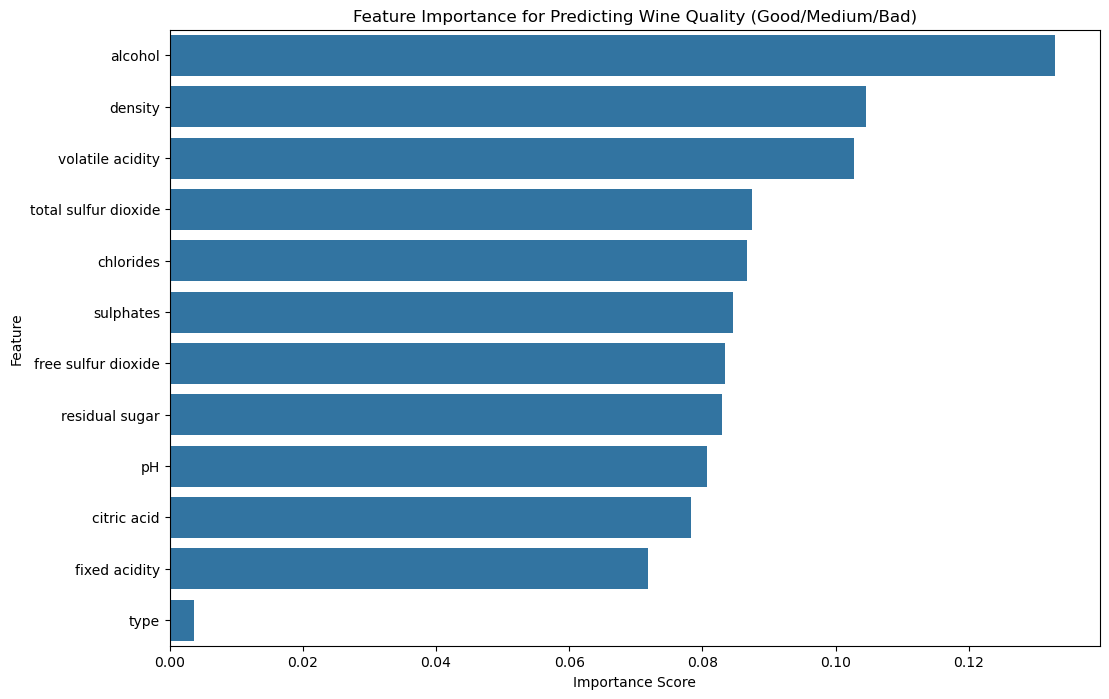

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


importances = rf_model_3_classes.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("--- Feature Importances (Sorted): ---")
print(importance_df)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Predicting Wine Quality (Good/Medium/Bad)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [17]:
import numpy as np 
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import classification_report, accuracy_score



n_components_pls = n_components_90
print(f"--- Using {n_components_pls} components for PLS-DA (based on 90% PCA) ---")

pls_model = PLSRegression(n_components=n_components_pls)
pls_model.fit(X_train_scaled, y_train)

y_pred_pls_raw = pls_model.predict(X_test_scaled)

# Round the raw predictions
y_pred_pls = np.round(y_pred_pls_raw)

# safety: "Clip" the predictions between 0 and 2
# (In case the model predicts -0.5 or 2.8)
y_pred_pls = np.clip(y_pred_pls, 0, 2)

# Convert to integers for the report
y_pred_pls = y_pred_pls.astype(int).flatten() 

pls_accuracy = accuracy_score(y_test, y_pred_pls)
print(f"\n--- Accuracy (Overall Precision) of the PLS-DA model: {pls_accuracy * 100:.2f}% ---")

print("\n--- Classification Report (PLS-DA): ---")
class_names = ["Bad (0)", "Medium (1)", "Good (2)"]
print(classification_report(y_test, y_pred_pls, target_names=class_names))

print("\n--- REMINDER: Classification Report (Random Forest): ---")
# We re-print the old report for easy comparison
y_pred_rf = rf_model_3_classes.predict(X_test_scaled) # We re-do the RF prediction
print(classification_report(y_test, y_pred_rf, target_names=class_names))

--- Using 8 components for PLS-DA (based on 90% PCA) ---

--- Accuracy (Overall Precision) of the PLS-DA model: 55.85% ---

--- Classification Report (PLS-DA): ---
              precision    recall  f1-score   support

     Bad (0)       0.70      0.45      0.55       477
  Medium (1)       0.50      0.82      0.62       567
    Good (2)       0.72      0.19      0.30       256

    accuracy                           0.56      1300
   macro avg       0.64      0.48      0.49      1300
weighted avg       0.62      0.56      0.53      1300


--- REMINDER: Classification Report (Random Forest): ---
              precision    recall  f1-score   support

     Bad (0)       0.80      0.78      0.79       477
  Medium (1)       0.69      0.74      0.72       567
    Good (2)       0.73      0.64      0.68       256

    accuracy                           0.74      1300
   macro avg       0.74      0.72      0.73      1300
weighted avg       0.74      0.74      0.74      1300



## V.Hyperparameter tuning

We will now try the Gradient Boosting Algorithm, and we will do a hyperparameter tuning on this algorithm with Bayesian Optimization

We will also use cross-validation with a 3-fold

In [21]:
import numpy as np
import pandas as pd
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


y_train_binned = (y_train)
y_test_binned = (y_test)


# --- 3. Define the Hyperparameter Space (Phase 4) ---
space_gbc  = [
    Integer(100, 700, name='n_estimators'),
    Real(1e-3, 5e-1, 'log-uniform', name='learning_rate'),
    Integer(2, 7, name='max_depth'),
    Integer(10, 100, name='min_samples_leaf'), # Very important against overfitting
    Real(0.7, 1.0, 'uniform', name='subsample')
]

# --- 4. Define the "Costly" Objective Function (F(x)) ---
# The objective is to MAXIMIZE the weighted F1-score
# (so we MINIMIZE the -F1-score)
@use_named_args(space_gbc)
def objective_gbc(**params):
    model = GradientBoostingClassifier(random_state=42, **params)
    
    # Using 'f1_weighted' is crucial for imbalanced classes
    score = cross_val_score(
        model, 
        X_train_scaled, 
        y_train_binned, 
        cv=3, # 3-fold Cross-validation
        n_jobs=-1, 
        scoring='f1_weighted' 
    )
    mean_score = np.mean(score)
    print(f"Testing params: {params} -> F1-weighted: {mean_score:.4f}")
    
    # gp_minimize MINIMIZES, so we return the negative score
    return -mean_score

# --- 5. Run Bayesian Optimization (EGO) ---
print("\n--- Starting Bayesian Optimization (EGO) for GBC ---")
# Budget of 30 evaluations
result_gbc = gp_minimize(
    objective_gbc,
    space_gbc,
    n_calls=30,
    random_state=42
)
print("--- Optimization Finished ---")

# --- 6. Extract the Best Parameters ---
best_f1_score = -result_gbc.fun
best_params_list_gbc = result_gbc.x
best_parameters_gbc = {
    'n_estimators': best_params_list_gbc[0],
    'learning_rate': best_params_list_gbc[1],
    'max_depth': best_params_list_gbc[2],
    'min_samples_leaf': best_params_list_gbc[3],
    'subsample': best_params_list_gbc[4]
}
print(f"\nBest F1-score (CV): {best_f1_score:.4f}")
print(f"Optimal parameters found: {best_parameters_gbc}")

# --- 7. Train the Final Model & Display the Report ---
print("\n--- Training the final GBC model with optimal parameters ---")
final_gbc_model = GradientBoostingClassifier(random_state=42, **best_parameters_gbc)

# Train on ALL the binned training set
final_gbc_model.fit(X_train_scaled, y_train_binned)

# Predict on the test set
y_pred_binned_final = final_gbc_model.predict(X_test_scaled)

# --- 8. FINAL CLASSIFICATION REPORT ---
print("\n--- CLASSIFICATION REPORT (Optimized GBC vs y_test) ---")
class_names = ["Bad (0)", "Medium (1)", "Good (2)"]
labels_we_expect = [0, 1, 2]

print(classification_report(
    y_test_binned, 
    y_pred_binned_final, 
    target_names=class_names, 
    labels=labels_we_expect,
    zero_division=0
))


--- Starting Bayesian Optimization (EGO) for GBC ---


Testing params: {'n_estimators': np.int64(578), 'learning_rate': 0.0031266912307463765, 'max_depth': np.int64(6), 'min_samples_leaf': np.int64(64), 'subsample': 0.8337498258560774} -> F1-weighted: 0.6075
Testing params: {'n_estimators': np.int64(160), 'learning_rate': 0.0173579720185871, 'max_depth': np.int64(4), 'min_samples_leaf': np.int64(23), 'subsample': 0.8952665418846559} -> F1-weighted: 0.6078
Testing params: {'n_estimators': np.int64(134), 'learning_rate': 0.08884909929476544, 'max_depth': np.int64(7), 'min_samples_leaf': np.int64(10), 'subsample': 0.9976634677873653} -> F1-weighted: 0.6789
Testing params: {'n_estimators': np.int64(470), 'learning_rate': 0.04475417267893931, 'max_depth': np.int64(2), 'min_samples_leaf': np.int64(12), 'subsample': 0.8574323980775167} -> F1-weighted: 0.6112
Testing params: {'n_estimators': np.int64(340), 'learning_rate': 0.0013364392600330286, 'max_depth': np.int64(7), 'min_samples_leaf': np.int64(31), 'subsample': 0.7271819303598462} -> F1-weig

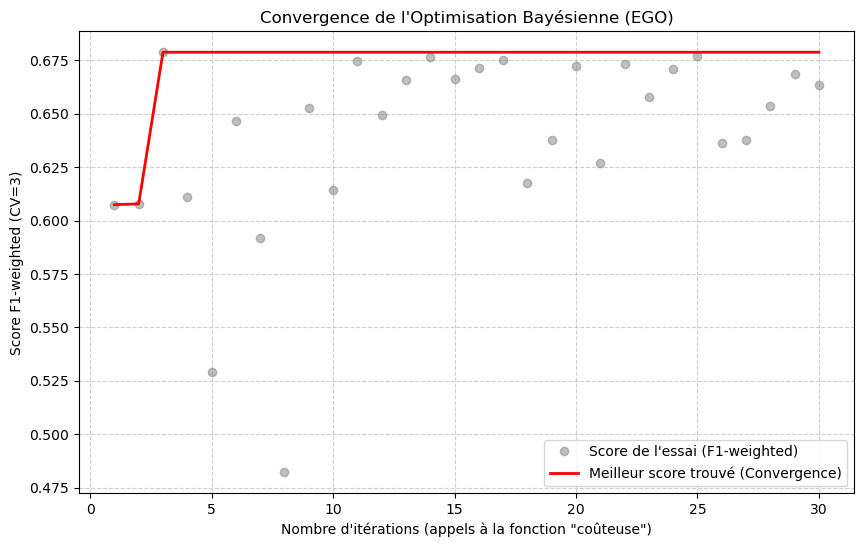

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Assurer que le résultat de l'optimisation existe ---
try:
    if 'result_gbc' not in locals():
        print("ERREUR: 'result_gbc' non trouvé.")
        print("Veuillez d'abord exécuter la cellule d'optimisation (gp_minimize).")
        raise NameError('result_gbc is not defined')

    # --- 2. Extraire les scores ---
    
    # result_gbc.func_vals contient les scores F1 *négatifs* (car on minimisait)
    # On les re-convertit en scores F1 positifs
    all_f1_scores = -np.array(result_gbc.func_vals)
    
    # --- 3. Calculer l'évolution du "Meilleur Score Trouvé Jusqu'ici" ---
    
    # C'est plus parlant que de voir le score de chaque essai.
    # np.maximum.accumulate() crée un "record" qui ne fait que s'améliorer.
    best_score_evolution = np.maximum.accumulate(all_f1_scores)
    
    n_iterations = len(all_f1_scores)
    
    # --- 4. Tracer le Graphique ---
    
    plt.figure(figsize=(10, 6))
    
    # Tracer le score de chaque itération (bruité)
    plt.plot(range(1, n_iterations + 1), all_f1_scores, 'o', c='grey', alpha=0.5, 
             label='Score de l\'essai (F1-weighted)')
    
    # Tracer la courbe de convergence (le meilleur score trouvé)
    plt.plot(range(1, n_iterations + 1), best_score_evolution, 'r-', lw=2, 
             label='Meilleur score trouvé (Convergence)')
    
    plt.xlabel('Nombre d\'itérations (appels à la fonction "coûteuse")')
    plt.ylabel('Score F1-weighted (CV=3)')
    plt.title('Convergence de l\'Optimisation Bayésienne (EGO)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

except NameError as e:
    pass # L'erreur a déjà été affichée

The results are not especially better than the Random Forest Algorithm.

It probably means that the random forest algorithm was already enough to have an optimzed accuracy

Let's see now how or model performs with binary classification. We are gonna print the ROC curve of the following problem: Is the wine good or not? (Is the quality of the wine superior to 7?) 


--- AUC-ROC Score (Good vs Not Good) ---
AUC = 0.9081


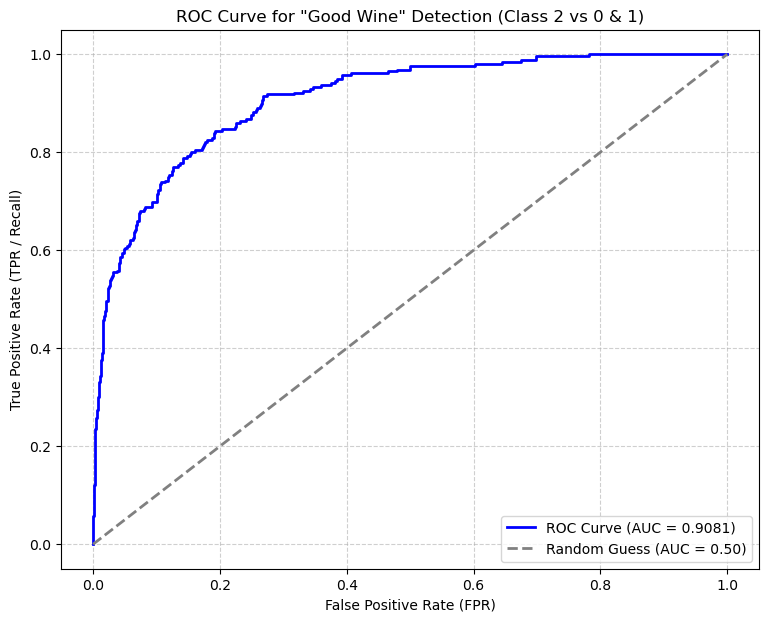

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# --- 1. Ensure the model exists ---
try:
    # Check if the final model from the previous cell exists
    if 'final_gbc_model' not in locals():
        print("ERROR: 'final_gbc_model' not found.")
        print("Please run the optimization (gp_minimize) and final training cell first.")
        raise NameError('final_gbc_model is not defined')

    # --- 2. Prepare Data for the ROC Curve (Binary) ---
    
    # y_test_binned contains (0, 1, 2)
    # We want: 1 if it's "Good" (class 2), 0 otherwise (classes 0 and 1)
    y_true_binary = (y_test_binned == 2).astype(int)
    
    # --- 3. Get Model Probabilities ---
    
    # predict_proba() gives probabilities for [class 0, class 1, class 2]
    all_probabilities = final_gbc_model.predict_proba(X_test_scaled)
    
    # We only need the probability of the "Good" class (class 2)
    # This is the 3rd column (index 2)
    y_score_good = all_probabilities[:, 2]

    # --- 4. Calculate the ROC Curve and AUC ---
    
    # fpr: False Positive Rate (X-axis)
    # tpr: True Positive Rate (Y-axis)
    fpr, tpr, thresholds = roc_curve(y_true_binary, y_score_good)
    
    # auc_score: The Area Under the Curve (the global performance score)
    auc_score = roc_auc_score(y_true_binary, y_score_good)

    print(f"\n--- AUC-ROC Score (Good vs Not Good) ---")
    print(f"AUC = {auc_score:.4f}")
    
    # --- 5. Plot the Graph ---
    
    plt.figure(figsize=(9, 7))
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, 
             label=f'ROC Curve (AUC = {auc_score:.4f})')
    
    # Plot the random guess line (diagonal)
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--', 
             label='Random Guess (AUC = 0.50)')
    
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR / Recall)')
    plt.title('ROC Curve for "Good Wine" Detection (Class 2 vs 0 & 1)')
    plt.legend(loc='lower right')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

except NameError as e:
    pass # The error was already printed

We have an AUC of 91%. Obviously our model is better when we're talking about binary classification and not multiclass classification. But here, we have a massive increase of performance that shows that our model is very efficient to detect good wines.

# VI. Conclusions

Let's review the different part we've been through:

- Exploration : We merged the red and white wine data and found a significant imbalance: most wines are 'medium' (scores 5, 6, 7), while 'good' or 'bad' scores are rare.

- Feature Engineering: Regression (predicting the exact score) failed (low R² < 0.60). The key step was transforming the problem into a 3-class classification: 'Bad' (0), 'Medium' (1), and 'Good' (2).

- Modeling & Tuning: A baseline RandomForestClassifier gave 73.5% accuracy. To optimize this, we used Bayesian Optimization (EGO) to find the best hyperparameters for a GradientBoostingClassifier (GBC).

- Conclusion: The optimized GBC model achieved 71% accuracy on the 3 classes. Its real success, however, was its ability to identify 'Good' wines: a binary analysis ('Good' vs. 'Not Good') showed excellent performance (91% AUC-ROC).

In short, the chemical features alone cannot predict the exact score, but they are highly effective (with the right model) at classifying a wine as 'Good'.